## Gaussian density estimation

In [1]:
# First let's generate some non-trivial data.
# Namely, n_vectors vectors close to k_clusters centers in d_ambient dimensions. 
import numpy as np

n_vectors = 10000
d_ambient = 32
k_clusters = 20
noise_level = 0.1
radius = 0.5*np.sqrt(d_ambient)
vectors = np.random.randn(k_clusters, d_ambient)[np.random.randint(0, k_clusters, n_vectors)]
vectors += noise_level*np.random.randn(n_vectors, d_ambient)
vectors /= radius

In [2]:
# Now we can create a coreset like this
from gde import GDE
d = d_ambient
k = 64

gde = GDE(k, d)
for vector in vectors:
    gde.update(vector) 
    
# let's see how large the coresent is
print(f"The sketch coreset contains {gde.size} elements")

The sketch coreset contains 412 elements


In [3]:
# To see how good the sketch is we need to define the kernel function
def kernel(vector_1, vector_2):
    return np.exp(-np.linalg.norm(vector_1 - vector_2)**2)

## And, we'll need a function that computes the exact density to compare to
def density(vectors, query):
    return np.mean([kernel(vector, query) for vector in vectors])

# Finally, we need to compare ourselves to a simple sketching algorithm
# which will be uniform sampling of the same size as the coreset
sampled_vectors = vectors[np.random.choice(n_vectors, gde.size)]

In [4]:
m = 50
densities = np.zeros( (m,3) )
cs = np.linspace(0.0, 3.0, m)
for i, c in enumerate(cs):
    query = c*vectors[0]
    densities[i,0] = density(vectors, query)
    densities[i,1] = gde.query(query)
    densities[i,2] = density(sampled_vectors, query)

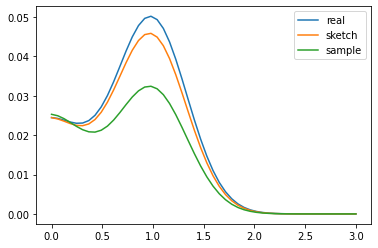

In [5]:
import matplotlib.pyplot as plt
plt.plot(cs, densities, label=['real','sketch','sample'])
plt.legend()
plt.show()

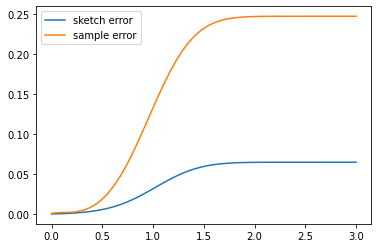

In [6]:
import matplotlib.pyplot as plt
plt.plot(cs, np.cumsum(np.abs(densities[:,0]-densities[:,1])), label='sketch error')
plt.plot(cs, np.cumsum(np.abs(densities[:,0]-densities[:,2])), label='sample error')
plt.legend()
plt.show()